In [2]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [3]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
extractor = extractor.fit(train_images, "12/train")
train_features = extractor.transform(train_images, "12/train")
test_features = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 0/116: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 1/116: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 2/116: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 3/116: 2/HeightFiltrartion_-1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 4/116: 2/HeightFiltrartion_0_-1
Got the result from ./12/train/filtrations/2/HeightFiltrart

In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "12/train")
train_diagrams = extractor.transform(train_images, "12/train")
test_diagrams = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/greyscale/diagrams.npy
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 0/116: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 1/116: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/116: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/116: 2/HeightFil

In [5]:
import cvtda.neural_network

train = cvtda.neural_network.Dataset(train_images, train_diagrams, train_features, train_labels)
test = cvtda.neural_network.Dataset(test_images, test_diagrams, test_features, test_labels)

Dataset: processing diagrams:  27%|██▋       | 32/118 [00:28<01:17,  1.11it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Dataset: processing diagrams: 100%|██████████| 118/118 [00:25<00:00,  4.69it/s]


In [36]:
import tqdm
import torch

for i in tqdm.trange(469):
    a = torch.cat([ torch.rand((128, 512)).to('cuda') ], dim = 1)
a.shape

100%|██████████| 469/469 [00:00<00:00, 3185.25it/s]


torch.Size([128, 512])

In [60]:
import cvtda.classification

nn = cvtda.classification.NNClassifier(
    # skip_diagrams=True,
    # skip_images=True,
    # skip_features=True
).fit(train, test)

Input to LazyLinear: 4800
Parameters: 20507562


Epoch 0:   4%|▍         | 19/469 [00:20<08:13,  1.10s/it]


KeyboardInterrupt: 

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.9289, 'TOP-2 Accuracy': 0.9696, 'TOP-3 Accuracy': 0.982, 'TOP-4 Accuracy': 0.9893, 'TOP-5 Accuracy': 0.9926, 'TOP-6 Accuracy': 0.9955, 'TOP-7 Accuracy': 0.9971, 'TOP-8 Accuracy': 0.9983, 'TOP-9 Accuracy': 0.9995, 'AUC-ROC': 0.9959136592508304, 'Precision': 0.9292947910932401, 'Recall': 0.9280952831569472, 'F1-score': 0.9278983334747839}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.9823, 'TOP-2 Accuracy': 0.9948, 'TOP-3 Accuracy': 0.9979, 'TOP-4 Accuracy': 0.9989, 'TOP-5 Accuracy': 0.9994, 'TOP-6 Accuracy': 0.9996, 'TOP-7 Accuracy': 0.9998, 'TOP-8 Accuracy': 1.0, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9997239226092332, 'Precision': 0.982143815246847, 'Recall': 0.9820280381245059, 'F1-score': 0.9820699194756337}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x00000243AB854460>
Input to LazyLinea

100%|██████████| 25/25 [01:12<00:00,  2.92s/it, loss=8.82e+4, val_acc=0.99] 


{'classifier': 'NNClassifier', 'Accuracy': 0.9898, 'TOP-2 Accuracy': 0.9972, 'TOP-3 Accuracy': 0.9984, 'TOP-4 Accuracy': 0.9987, 'TOP-5 Accuracy': 0.9993, 'TOP-6 Accuracy': 0.9997, 'TOP-7 Accuracy': 0.9997, 'TOP-8 Accuracy': 0.9999, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9996863804840841, 'Precision': 0.9897350226338746, 'Recall': 0.9897167349684933, 'F1-score': 0.9897167988514823}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Binning 6.569 GB of training data: 46.727 s
Binning 0.730 GB of validation data: 0.820 s
Fitting gradient boosted rounds:
[1/20] 10 trees, 156 leaves (15 on avg), max depth = 4, train loss: 1.54678, val loss: 1.55782, in 3.620s
[2/20] 10 trees, 159 leaves (15 on avg), max depth = 4, train loss: 1.21505, val loss: 1.22976, in 3.696s
[3/20] 10 trees, 159 leaves (15 on avg), max depth = 4, train loss: 0.99286, val loss: 1.00935, in 3.705s
[4/20] 10 trees, 158 leaves (15 on a

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [02:34:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.9843, 'TOP-2 Accuracy': 0.9959, 'TOP-3 Accuracy': 0.9986, 'TOP-4 Accuracy': 0.9995, 'TOP-5 Accuracy': 0.9996, 'TOP-6 Accuracy': 0.9998, 'TOP-7 Accuracy': 1.0, 'TOP-8 Accuracy': 1.0, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9998431455652436, 'Precision': 0.984170002822615, 'Recall': 0.9841045334366196, 'F1-score': 0.9841192981196347}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9289,0.9696,0.9820,0.9893,0.9926,0.9955,0.9971,0.9983,0.9995,0.995914,0.929295,0.928095,0.927898
1,RandomForestClassifier,0.9823,0.9948,0.9979,0.9989,0.9994,0.9996,0.9998,1.0000,1.0000,0.999724,0.982144,0.982028,0.982070
2,NNClassifier,0.9898,0.9972,0.9984,0.9987,0.9993,0.9997,0.9997,0.9999,1.0000,0.999686,0.989735,0.989717,0.989717
3,HistGradientBoostingClassifier,0.9764,0.9938,0.9975,0.9987,0.9994,0.9997,0.9999,1.0000,1.0000,0.999542,0.976277,0.976009,0.976120
4,CatBoostClassifier,0.9866,0.9976,0.9994,0.9997,0.9998,1.0000,1.0000,1.0000,1.0000,0.999894,0.986599,0.986473,0.986520
5,XGBClassifier,0.9843,0.9959,0.9986,0.9995,0.9996,0.9998,1.0000,1.0000,1.0000,0.999843,0.984170,0.984105,0.984119


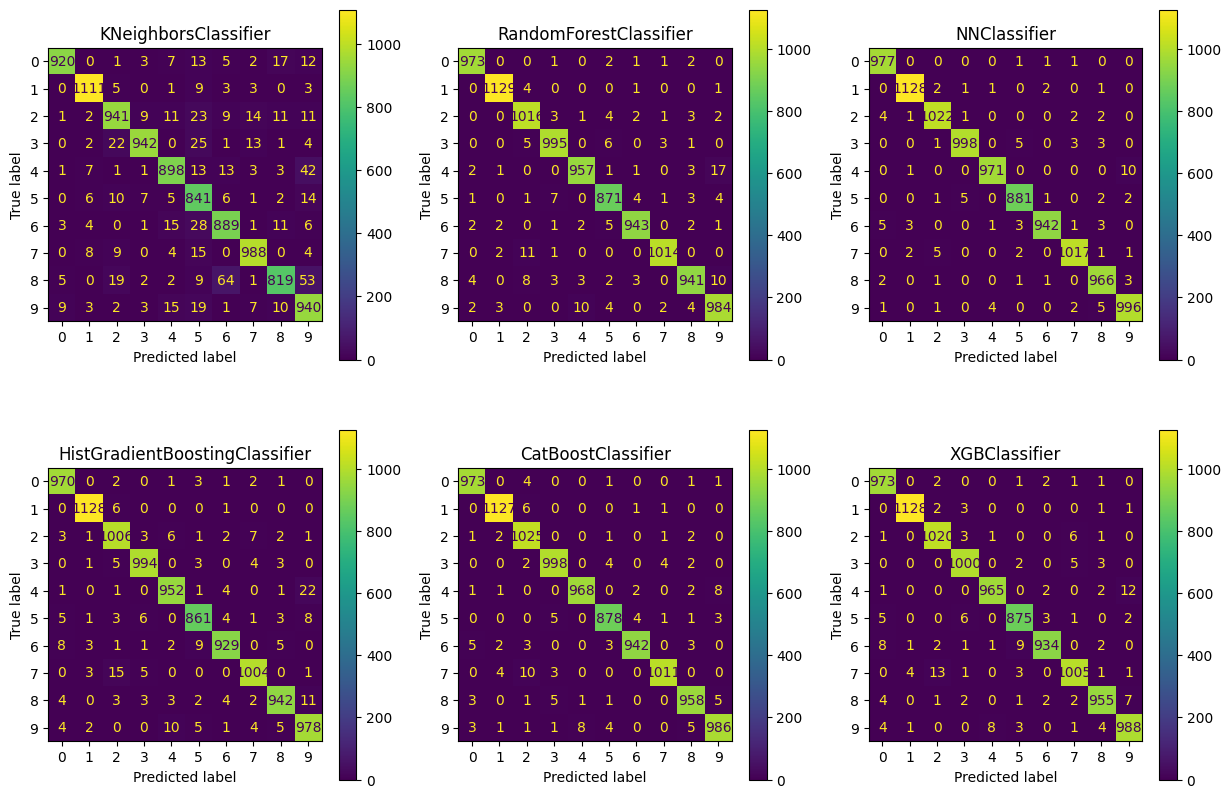

In [ ]:
import cvtda.classification

cvtda.classification.classify(train_scaled, train_labels, test_scaled, test_labels)